In [10]:
!pip install pyshp


     |████████████████████████████████| 219 kB 35.7 MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-py3-none-any.whl size=37325 sha256=fbcfdd5ae7210ea006ce1d0b8a35959c671385b203e24f1dfd9a54d8b749b1cc
  Stored in directory: /root/.cache/pip/wheels/43/f8/87/53c8cd41545ba20e536ea29a8fcb5431b5f477ca50d5dffbbe
Successfully built pyshp


In [104]:
import matplotlib.pyplot as plt
import shapefile
from shapely import geometry

shape = shapefile.Reader("ne_10m_admin_0_countries.shp")


id: 81


In [151]:
id = -1
for i in range(len(shape)):
  feature = shape.shapeRecords()[i]
  if feature.record.NAME_EN == "Lithuania":
    id = i
    break 

if id == -1:
  print("Tokios šalies nėra")
else:
  print("id: " + str(id) )

id: 44


Lithuania
2
[(26.594531291000067, 26.603833048000098, 26.607657105000044, 26.605176635000078, 26.59556481900006, 26.576134480000064, 26.551639852000108, 26.532106161000115, 26.5276619870001, 26.546472209000115, 26.543268270000056, 26.507818238000112, 26.49923995000009, 26.486010783000097, 26.479086141000096, 26.455211629000104, 26.445496460000072, 26.45004398600011, 26.46575362200008, 26.525388224000096, 26.542338094000087, 26.60269616700009, 26.768629191000088, 26.79157352700011, 26.80072025600009, 26.78966149900009, 26.76558028100004, 26.739901281000073, 26.701088094000113, 26.68568851700013, 26.65695642100013, 26.641143432000035, 26.633908732000066, 26.627500854000118, 26.616338745000093, 26.60093916800011, 26.578925008000027, 26.47340173300006, 26.459139038000075, 26.450664103000094, 26.444772989000086, 26.4385718180001, 26.42875329600014, 26.420278361000044, 26.309484090000126, 26.26442224100009, 26.233002971000133, 26.2303157960001, 26.231245971000078, 26.229385620000073, 26.2246

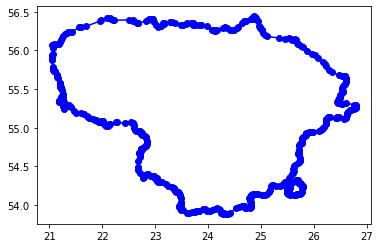

In [152]:
#id = 5
feature = shape.shapeRecords()[id]
print(feature.record.NAME_EN)
largestAreaID = 0
if feature.shape.__geo_interface__['type'] == 'MultiPolygon': 
  print(len(feature.shape.__geo_interface__['coordinates']))
  area = 0
  for i in range(len(feature.shape.__geo_interface__['coordinates'])):
    points = feature.shape.__geo_interface__['coordinates'][i][0]
    polygon = geometry.Polygon(points)
    if polygon.area > area:
      area = polygon.area
      largestAreaID = i

  xxyy = feature.shape.__geo_interface__['coordinates'][largestAreaID][0]
else:
  xxyy = feature.shape.__geo_interface__['coordinates'][0]

  
xy = list(zip(*xxyy))
print(xy)
X = xy[0]
Y = xy[1]
plt.plot(X,Y, 'bo-')

print(shape)